In [87]:
import pandas as pd
import tensorflow as tf
import numpy as np
import scipy.io
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics
from keras.layers.core import Dense, Activation
import pandas


In [164]:
df = pd.read_csv("kddcup99.csv")

In [165]:
df.columns = [
    'duration',
    'protocol_type',
    'service',
    'flag',
    'src_bytes',
    'dst_bytes',
    'land',
    'wrong_fragment',
    'urgent',
    'hot',
    'num_failed_logins',
    'logged_in',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_count',
    'dst_host_srv_count',
    'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate',
    'outcome'
]

# display 5 rows


#cleaning up data and dropping NaN and Infinity Values
df = df.dropna()
assert pd.isnull(df).sum().sum() == 0 
assert pd.isna(df).sum().sum() == 0
df.replace(np.nan, 0, inplace=True)

df[0:5]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,239,486,0,0,0,0,...,19.0,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29.0,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39.0,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49.0,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59.0,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [166]:
#Convert Malicious packets into true and normal into false

df['Target'] = df['outcome'] != 'normal.'
df = df.drop('outcome', axis=1)

#Features
x = df.drop(['Target'], axis = 1)
y = df[['Target']]

#Outcomes - Turning into Dummy variables as string cantnot passs through an array into the neural net.
#y = df['outcome']
#dummies = pd.get_dummies(y['outcome'])
#y = dummies.values

df = pd.DataFrame(x)

df[0:5]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,http,SF,239,486,0,0,0,0,...,19.0,19.0,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29.0,29.0,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39.0,39.0,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49.0,49.0,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59.0,59.0,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0


In [167]:
# Categorical boolean mask
# shows categorical features 
categorical_feature_mask = x.dtypes==object

In [168]:
# filter categorical columns using mask and turn it into a list
categorical_cols = x.columns[categorical_feature_mask].tolist()

In [169]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
x[categorical_cols] = x[categorical_cols].apply(lambda col: le.fit_transform(col))

x[categorical_cols].head(5)



,protocol_type,service,flag
0,1,22,9
1,1,22,9
2,1,22,9
3,1,22,9
4,1,22,9


In [170]:
#Turn categorical data into intergers of 0 & 1 

dummies = pd.get_dummies(df['protocol_type'],['service'],['flag'])

#drop as column is now encoded
x = x.drop(['protocol_type','service','flag'], axis = 1)

#concat dummy values to the dataframe

x = x.join(dummies)

x[0:9]

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,['service']['flag']0,['service']['flag']1,['service']['flag']2
0,0,239,486,0,0,0,0,0,1,0,...,0.0,0.05,0.00,0.0,0.0,0.0,0.0,0,1,0
1,0,235,1337,0,0,0,0,0,1,0,...,0.0,0.03,0.00,0.0,0.0,0.0,0.0,0,1,0
2,0,219,1337,0,0,0,0,0,1,0,...,0.0,0.03,0.00,0.0,0.0,0.0,0.0,0,1,0
3,0,217,2032,0,0,0,0,0,1,0,...,0.0,0.02,0.00,0.0,0.0,0.0,0.0,0,1,0
4,0,217,2032,0,0,0,0,0,1,0,...,0.0,0.02,0.00,0.0,0.0,0.0,0.0,0,1,0
5,0,212,1940,0,0,0,0,0,1,0,...,0.0,1.00,0.04,0.0,0.0,0.0,0.0,0,1,0
6,0,159,4087,0,0,0,0,0,1,0,...,0.0,0.09,0.04,0.0,0.0,0.0,0.0,0,1,0
7,0,210,151,0,0,0,0,0,1,0,...,0.0,0.12,0.04,0.0,0.0,0.0,0.0,0,1,0
8,0,212,786,0,0,0,1,0,1,0,...,0.0,0.12,0.05,0.0,0.0,0.0,0.0,0,1,0


In [171]:
#drop the last dummy section 
x.drop(x.columns[-1], axis = 1)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,['service']['flag']0,['service']['flag']1
0,0,239,486,0,0,0,0,0,1,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0,1
1,0,235,1337,0,0,0,0,0,1,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0,1
2,0,219,1337,0,0,0,0,0,1,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0,1
3,0,217,2032,0,0,0,0,0,1,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0,1
4,0,217,2032,0,0,0,0,0,1,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316583,0,1032,0,0,0,0,0,0,0,0,...,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,1,0
316584,0,1032,0,0,0,0,0,0,0,0,...,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,1,0
316585,0,1032,0,0,0,0,0,0,0,0,...,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,1,0
316586,0,1032,0,0,0,0,0,0,0,0,...,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,1,0


In [172]:
# Turn Outcomes into dummy variables 

dummies = pd.get_dummies(y['Target'])

# This will turn BENIGN values into 1 being False and all malicious packets into 0 being True. 
y = dummies.values

print(y)

[[1 0]
 [1 0]
 [1 0]
 ...
 [0 1]
 [0 1]
 [0 1]]


In [173]:
# Get column names first
names = x.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit data on the scaler object
scaled_df = scaler.fit_transform(x)
scaled_df = pd.DataFrame(scaled_df, columns=names)

x = pd.DataFrame(scaled_df)

x[0:5]

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,['service']['flag']0,['service']['flag']1,['service']['flag']2
0,-0.033283,-0.003377,-0.017420,-0.007328,-0.037816,-0.003212,-0.052508,-0.012108,2.017251,-0.007657,...,-0.221127,-1.287546,-0.190865,-0.390287,-0.388853,-0.138878,-0.135406,-1.298495,1.368445,-0.157402
1,-0.033283,-0.003380,0.003670,-0.007328,-0.037816,-0.003212,-0.052508,-0.012108,2.017251,-0.007657,...,-0.221127,-1.330369,-0.190865,-0.390287,-0.388853,-0.138878,-0.135406,-1.298495,1.368445,-0.157402
2,-0.033283,-0.003393,0.003670,-0.007328,-0.037816,-0.003212,-0.052508,-0.012108,2.017251,-0.007657,...,-0.221127,-1.330369,-0.190865,-0.390287,-0.388853,-0.138878,-0.135406,-1.298495,1.368445,-0.157402
3,-0.033283,-0.003394,0.020894,-0.007328,-0.037816,-0.003212,-0.052508,-0.012108,2.017251,-0.007657,...,-0.221127,-1.351780,-0.190865,-0.390287,-0.388853,-0.138878,-0.135406,-1.298495,1.368445,-0.157402
4,-0.033283,-0.003394,0.020894,-0.007328,-0.037816,-0.003212,-0.052508,-0.012108,2.017251,-0.007657,...,-0.221127,-1.351780,-0.190865,-0.390287,-0.388853,-0.138878,-0.135406,-1.298495,1.368445,-0.157402


In [174]:
#Perform PCA to reduce dimensionality of feature vector for better accuracy
#reduce from 37 to 2 dimensional space

pca=PCA(n_components = 2)
pca.fit(x)
x_scaled = pca.transform(x)
print ("Original Shape:   ", x.shape)
print ("Transformed Shape:",x_scaled.shape)

x = x_scaled

print(x)

Original Shape:    (316588, 41)
Transformed Shape: (316588, 2)
[[ 1.98941188  2.26056854]
 [ 1.95911523  2.23510217]
 [ 1.9211848   2.20809258]
 ...
 [-2.01700102 -0.55576584]
 [-2.01700102 -0.55576584]
 [-2.01700102 -0.55576584]]


In [206]:
#Split into test and training sets. 25% test sample 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state=45)

In [233]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(hidden_layer_sizes=(80,40,20), 
                           max_iter=100,activation = 'relu',solver='adam', 
                           early_stopping= True, learning_rate_init = 0.0001, tol = 1e-4, 
                           verbose = True, random_state=45, momentum = 0.9,n_iter_no_change = 10 )
#Uses Log Loss function
#same as Categorical


In [234]:
#Fitting the training data to the network
classifier.fit(x_train, y_train)

Iteration 1, loss = 0.55444988
Validation score: 0.977213
Iteration 2, loss = 0.13297109
Validation score: 0.982673
Iteration 3, loss = 0.11209301
Validation score: 0.983079
Iteration 4, loss = 0.10613991
Validation score: 0.983215
Iteration 5, loss = 0.10168513
Validation score: 0.984839
Iteration 6, loss = 0.09844389
Validation score: 0.985290
Iteration 7, loss = 0.09610961
Validation score: 0.985696
Iteration 8, loss = 0.09429666
Validation score: 0.986012
Iteration 9, loss = 0.09270263
Validation score: 0.986102
Iteration 10, loss = 0.09138119
Validation score: 0.986328
Iteration 11, loss = 0.09025457
Validation score: 0.986283
Iteration 12, loss = 0.08926267
Validation score: 0.986554
Iteration 13, loss = 0.08831103
Validation score: 0.986508
Iteration 14, loss = 0.08749496
Validation score: 0.986599
Iteration 15, loss = 0.08672586
Validation score: 0.986734
Iteration 16, loss = 0.08606286
Validation score: 0.986508
Iteration 17, loss = 0.08563219
Validation score: 0.986599
Iterat

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(80, 40, 20), learning_rate='constant',
              learning_rate_init=0.0001, max_iter=100, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=45, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)

In [243]:
#import pickle 
  
# Save the trained model as a pickle string. 
saved_model = pickle.dumps(classifier) 

In [244]:
# Load the pickled model 
#classifier_from_pickle = pickle.loads(saved_model) 

In [235]:
y_pred = classifier.predict(x_test)

In [236]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred.argmax(axis = 1), y_test.argmax(axis = 1))


In [237]:
cm



array([[21153,  1174],
       [   53, 72597]])

In [238]:
#True Positive (TP) : Observation is positive, and is predicted to be positive.
#False Negative (FN) : Observation is positive, but is predicted negative.
#True Negative (TN) : Observation is negative, and is predicted to be negative.
#False Positive (FP) : Observation is negative, but is predicted positive.

TP = 21153
FP = 1174
FN = 53
TN = 72597

In [239]:
Acc = ((TP + TN)/(TP + TN + FP + FN))

print( "Accuracy", Acc)

Accuracy 0.9870810827884646


In [240]:
# Recall 

Recall = ((TP)/(TP + FN))

print("Recall", Recall)

Recall 0.9975007073469773


In [241]:
# Precision

Precision = ((TP)/(TP+FP))

print("Precision", Precision)

Precision 0.9474179244860483


Text(0.5, 0, 'number of steps')

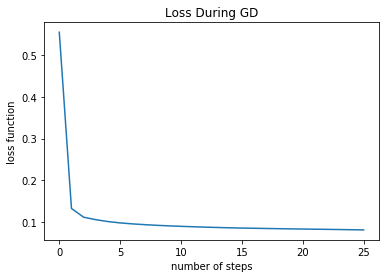

In [242]:
plt.plot(classifier.loss_curve_)
plt.title('Loss During GD')
plt.ylabel('loss function')
plt.xlabel('number of steps')
